## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## Reading csv file into dataframe

In [2]:
df = pd.read_csv('glasses.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3975266 entries, 0 to 3975265
Data columns (total 12 columns):
NUM       int64
DATE      object
ACC_X     int64
ACC_Y     int64
ACC_Z     int64
GYRO_X    int64
GYRO_Y    int64
GYRO_Z    int64
EOG_L     int64
EOG_R     int64
EOG_H     int64
EOG_V     int64
dtypes: int64(11), object(1)
memory usage: 363.9+ MB


In [4]:
df.head()

,NUM,DATE,ACC_X,ACC_Y,ACC_Z,GYRO_X,GYRO_Y,GYRO_Z,EOG_L,EOG_R,EOG_H,EOG_V
0,1,2017/06/29 08:00:00.406,-3242,10396,-6489,9117,2018,-819,-330,-186,-144,258
1,3,2017/06/29 08:00:00.426,-4014,11348,-15131,3359,-882,-2009,-305,-156,-149,230
2,5,2017/06/29 08:00:00.446,-3223,10918,-8496,-460,211,-2631,-64,84,-148,-10
3,7,2017/06/29 08:00:00.466,-5255,10690,-10854,1152,333,-3799,314,432,-118,-373
4,9,2017/06/29 08:00:00.486,-560,14164,-8619,-327,488,-2833,577,643,-66,-610


In [5]:
df.describe()

,NUM,ACC_X,ACC_Y,ACC_Z,GYRO_X,GYRO_Y,GYRO_Z,EOG_L,EOG_R,EOG_H,EOG_V
count,3.975266e+06,3.975266e+06,3.975266e+06,3.975266e+06,3.975266e+06,3.975266e+06,3.975266e+06,3.975266e+06,3.975266e+06,3.975266e+06,3.975266e+06
mean,2.446650e+05,-2.489555e+03,4.689672e+03,-1.460659e+04,-6.678384e+01,-3.783891e+00,-2.270821e+01,-1.490167e+02,3.271996e+00,-1.522887e+02,7.268857e+01
std,1.677901e+05,3.124635e+03,3.926252e+03,2.980375e+03,1.655474e+03,1.719377e+03,3.311955e+03,2.262459e+02,2.294447e+02,1.331924e+02,2.178225e+02
min,1.000000e+00,-3.276800e+04,-3.276800e+04,-3.276800e+04,-3.276800e+04,-3.276800e+04,-3.276800e+04,-2.048000e+03,-2.048000e+03,-3.897000e+03,-1.842000e+03
25%,1.040530e+05,-4.148000e+03,2.218000e+03,-1.583300e+04,-3.340000e+02,-2.550000e+02,-3.170000e+02,-1.760000e+02,-1.900000e+01,-1.700000e+02,4.600000e+01
50%,2.188700e+05,-2.931000e+03,5.231000e+03,-1.487500e+04,-8.800000e+01,0.000000e+00,-1.800000e+01,-1.520000e+02,4.000000e+00,-1.570000e+02,7.400000e+01
75%,3.623860e+05,-1.177000e+03,7.225000e+03,-1.376900e+04,1.580000e+02,2.380000e+02,2.760000e+02,-1.220000e+02,3.300000e+01,-1.430000e+02,9.600000e+01
max,7.360790e+05,2.877300e+04,3.234300e+04,3.276700e+04,3.276700e+04,3.276700e+04,3.276600e+04,1.859000e+03,1.858000e+03,3.907000e+03,2.048000e+03


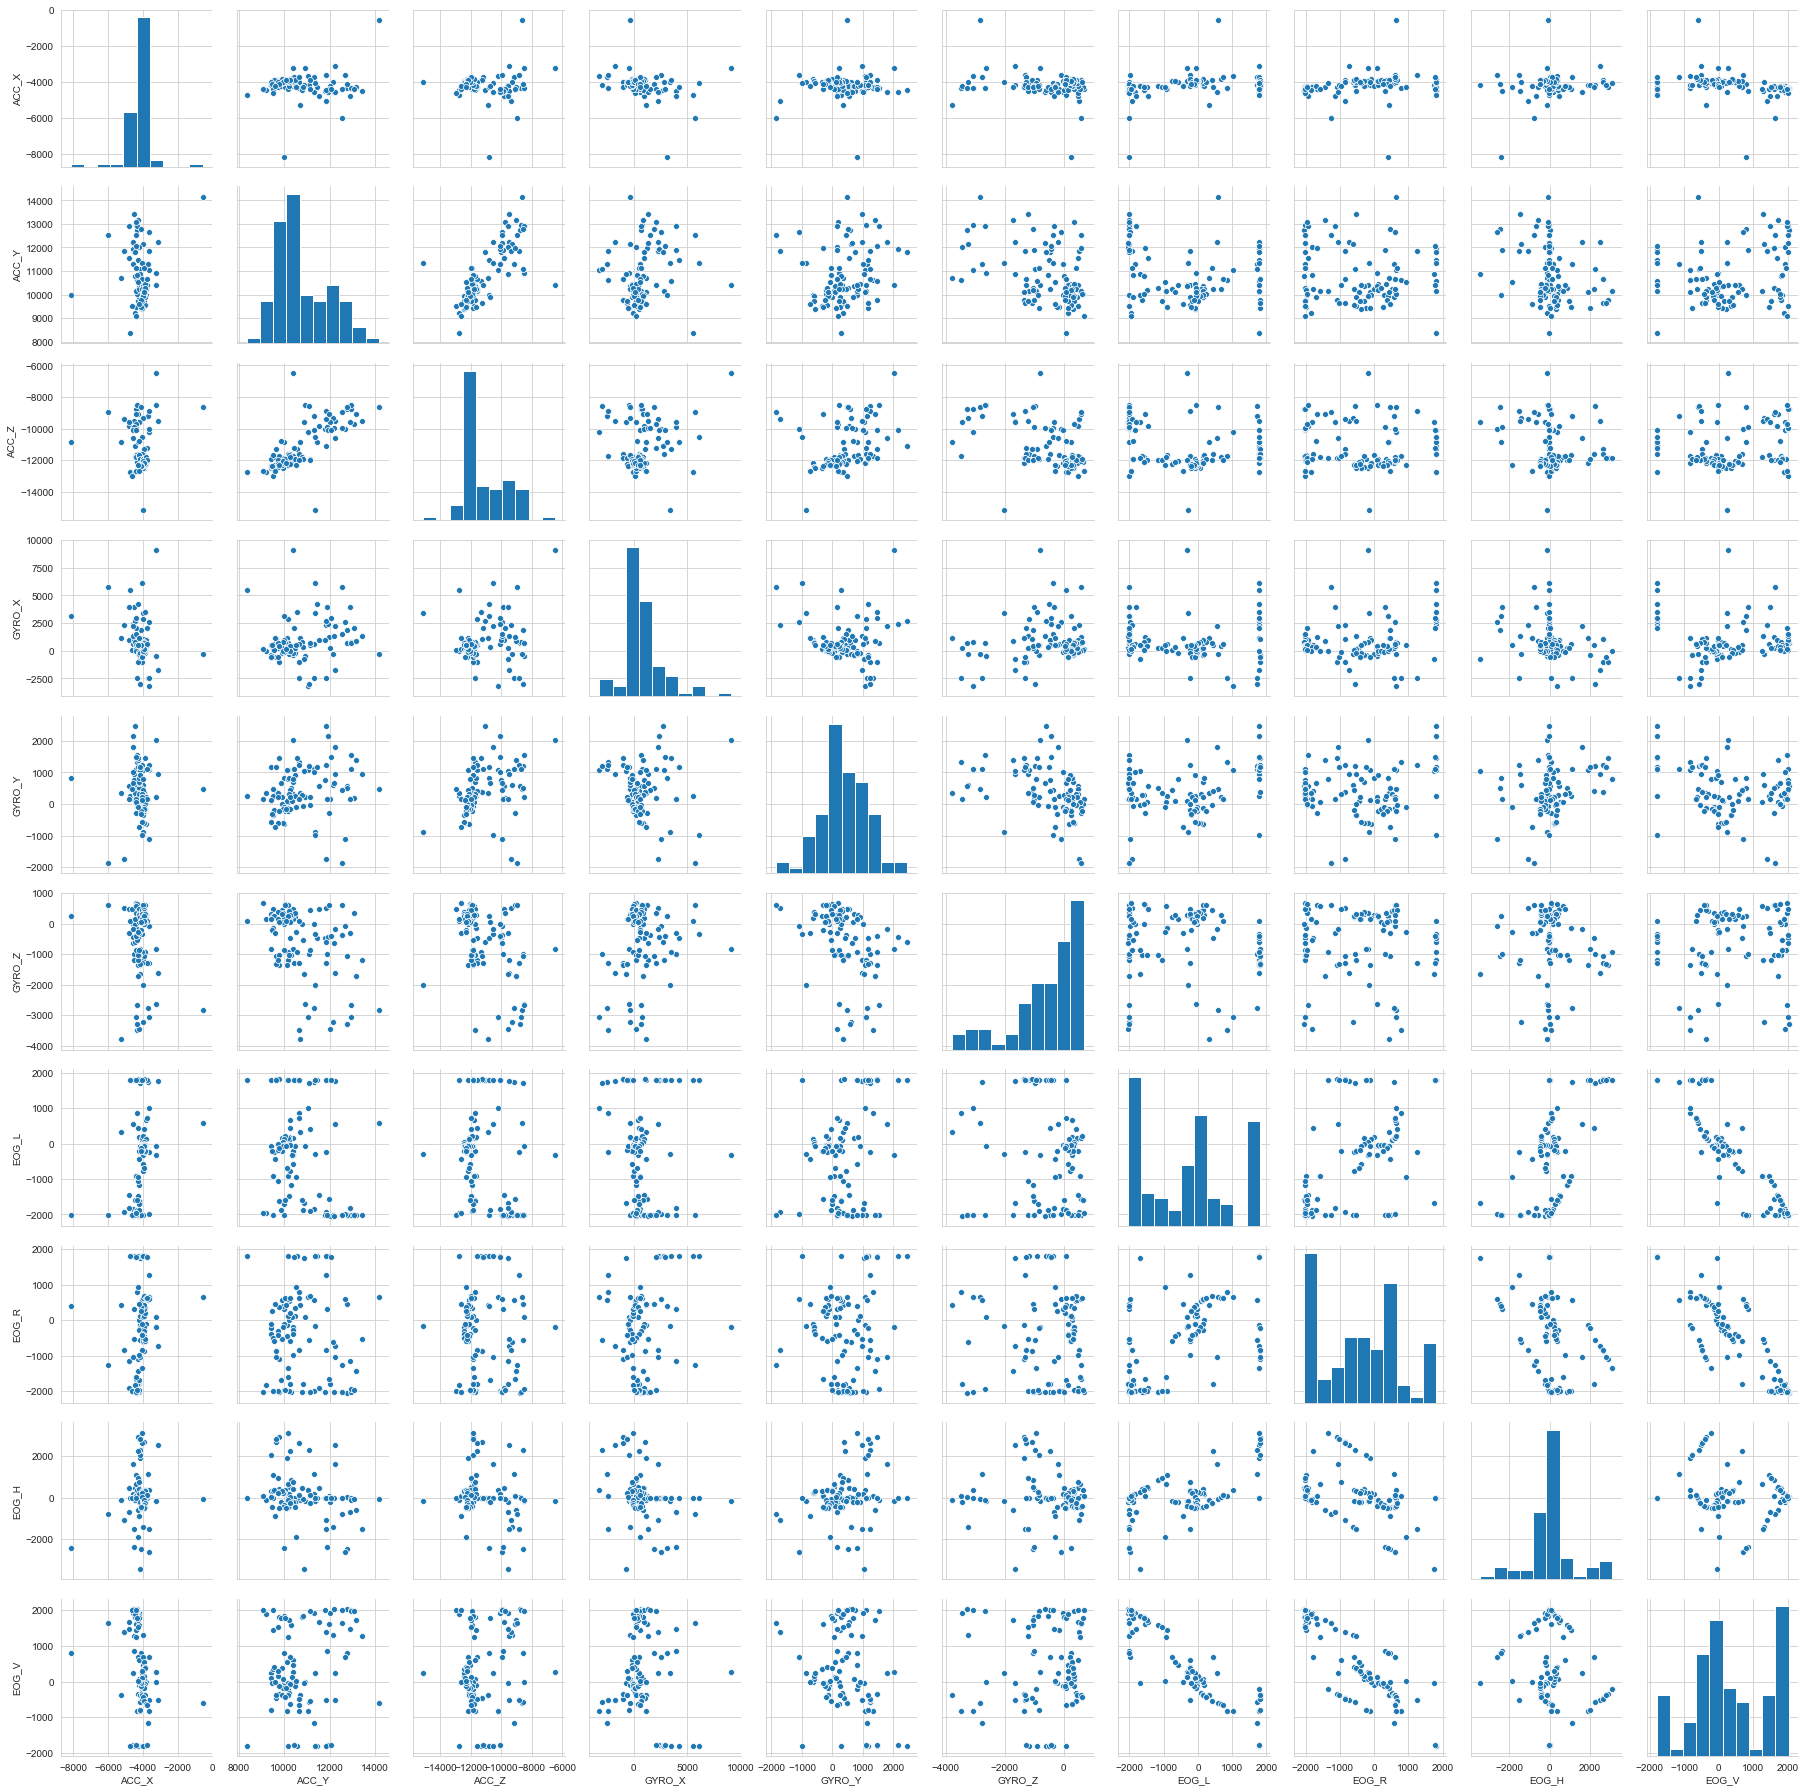

In [6]:
sns.set_style('whitegrid')
sns.pairplot(df.drop('NUM', axis=1).head(100))

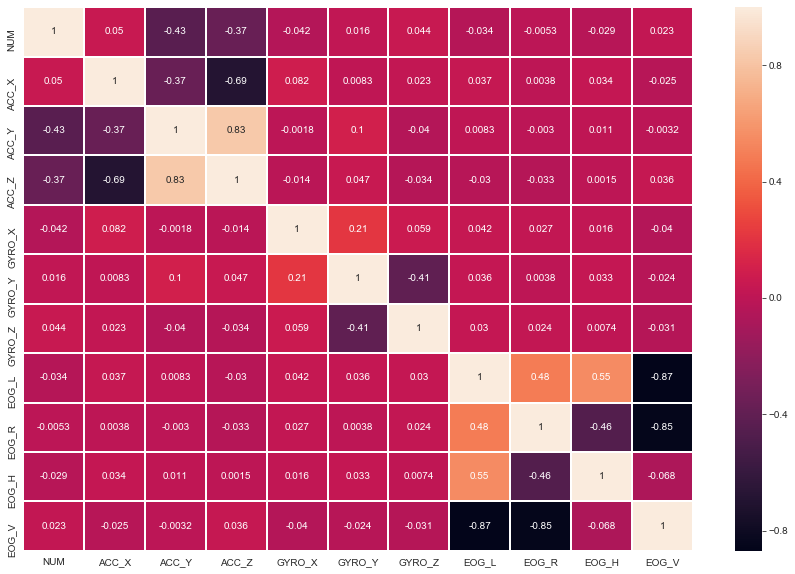

In [7]:
plt.figure(figsize = (15,10))
sns.heatmap(df.head(5000).corr(), annot = True,linewidths=1, linecolor='white')

In [10]:
df['DATE'].iloc[0]

'2017/06/29 08:00:00.406'

In [11]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [12]:
df['Hour'] = df['DATE'].apply(lambda time: time.hour)
df['Month'] = df['DATE'].apply(lambda time: time.month)
df['Day of Week'] = df['DATE'].apply(lambda time: time.dayofweek)

In [13]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [14]:
def daytime(num):
    if(5<= num<12):
        return 'Morning'
    elif(12<= num < 17):
        return 'Afternoon'
    elif(17<= num <24 or 0<= num <5):
        return 'Evening'


In [15]:
df['DayTime'] = df['Hour'].apply(daytime)

In [16]:
df.head()

,NUM,DATE,ACC_X,ACC_Y,ACC_Z,GYRO_X,GYRO_Y,GYRO_Z,EOG_L,EOG_R,EOG_H,EOG_V,Hour,Month,Day of Week,DayTime
0,1,2017-06-29 08:00:00.406,-3242,10396,-6489,9117,2018,-819,-330,-186,-144,258,8,6,Thu,Morning
1,3,2017-06-29 08:00:00.426,-4014,11348,-15131,3359,-882,-2009,-305,-156,-149,230,8,6,Thu,Morning
2,5,2017-06-29 08:00:00.446,-3223,10918,-8496,-460,211,-2631,-64,84,-148,-10,8,6,Thu,Morning
3,7,2017-06-29 08:00:00.466,-5255,10690,-10854,1152,333,-3799,314,432,-118,-373,8,6,Thu,Morning
4,9,2017-06-29 08:00:00.486,-560,14164,-8619,-327,488,-2833,577,643,-66,-610,8,6,Thu,Morning
